In [2]:
import os, sys
import numpy as np
import cv2
import scipy
import moviepy.editor as mpe
from moviepy.video.io.bindings import mplfig_to_npimage

from matplotlib import pyplot as plt

%matplotlib inline
from scipy.sparse.linalg import svds
np.set_printoptions(precision=4, linewidth=100)

In [5]:
path = "./video/video-1522129782.mp4"
# path_008 = "./dataset/Video_008/Video_008.avi"
video = mpe.VideoFileClip(path)
video.subclip(0,3).ipython_display(width=500)

 99%|█████████▉| 90/91 [00:00<00:00, 146.68it/s]


In [6]:
print("Video duration: {}"
      .format(video.duration))
print("Every frame size is {s[0]} * {s[1]}".format(s=video.size))

Video duration: 8.68
Every frame size is 720 * 1280


In [236]:
def rgb2gray(rgb):
    return np.dot(rgb[..., :3], [0.299, 0.587, 0.114])

def red_fitler(frame):
    frame_copy = frame.copy()
    frame_copy[np.where((np.abs(frame[:,:,1]-frame[:,:,0]) < 100) 
                        | (np.abs(frame[:,:,1]-frame[:,:,2]) <100) 
            )] =0
    frame_copy[np.where(np.sum(frame ,axis=2) > 200) ] = 0
    fill_frame = np.zeros((frame_copy.shape[0],frame_copy.shape[1]))
    x = np.where(frame_copy!=0)[0]
    y = np.where(frame_copy!=0)[1]
    fill_frame[x, y] = 255
    return fill_frame

def create_data_matrix_from_video(clip, fps=5, scale=50):
    return np.vstack([scipy.misc.imresize(red_fitler(clip.get_frame(i / float(fps))).astype(int), scale).flatten() 
                      for i in range(fps * int(clip.duration))]).T


In [256]:
frame.shape

(1280, 720, 3)

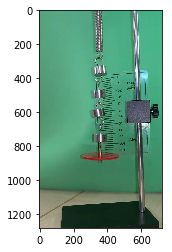

In [7]:
plt.imshow(frame)
plt.show()

In [184]:
frame_copy = frame.copy()
frame_copy[np.where((np.abs(frame[:,:,1]-frame[:,:,0]) < 100) | 
                    (np.abs(frame[:,:,1]-frame[:,:,2]) <100) 
            )] =0

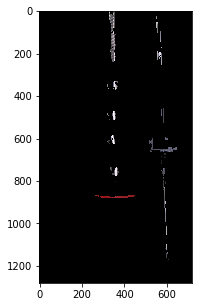

In [185]:
plt.figure(figsize=(5,5))
plt.imshow(frame_copy)

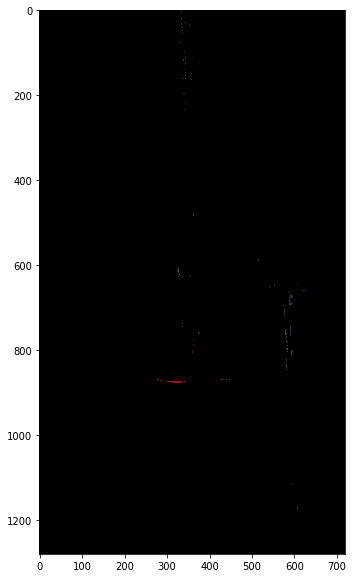

In [186]:
frame_copy[np.where(np.sum(frame ,axis=2) > 200) ] = 0
plt.figure(figsize=(10,10))
plt.imshow(frame_copy)

In [229]:
fill_frame = np.zeros((frame_copy.shape[0],frame_copy.shape[1]))
x = np.where(frame_copy!=0)[0]
y = np.where(frame_copy!=0)[1]
fill_frame[x, y] = 255

In [227]:
np.where(fill_frame==255)

(array([   2,    2,    2, ..., 1173, 1173, 1173]),
 array([334, 334, 334, ..., 609, 609, 609]),
 array([0, 1, 2, ..., 0, 1, 2]))

In [228]:
fill_frame.shape

(1280, 720, 3)

In [210]:
len(np.where(frame_copy!=0)[0])

3162

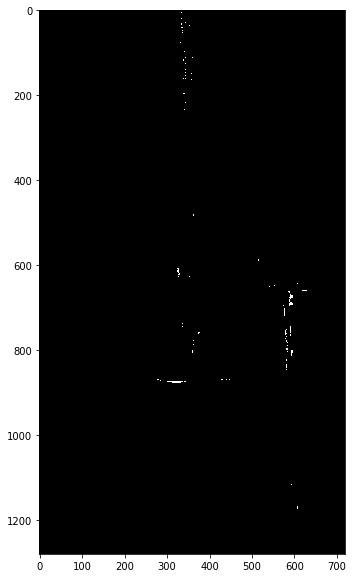

In [232]:
plt.figure(figsize=(6,10))
plt.imshow(fill_frame, cmap="gray")
plt.show()

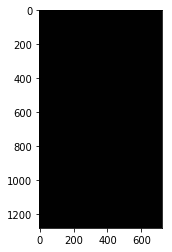

In [207]:
plt.imshow(fill_frame)
plt.show()

In [134]:
np.nonzero(frame_copy)

(array([   2,    2,    2, ..., 1173, 1173, 1173]),
 array([334, 334, 334, ..., 609, 609, 609]),
 array([0, 1, 2, ..., 0, 1, 2]))

In [135]:
frame_copy.shape

(1280, 720, 3)

In [118]:
np.sum(frame ,axis=2)

array([[378, 378, 378, ..., 379, 379, 379],
       [378, 378, 378, ..., 379, 379, 379],
       [378, 378, 378, ..., 379, 379, 379],
       ...,
       [486, 486, 486, ..., 398, 398, 398],
       [486, 486, 486, ..., 398, 398, 398],
       [486, 486, 486, ..., 398, 398, 398]], dtype=uint64)

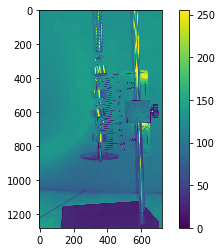

In [60]:
plt.imshow(frame[:,:,2])
plt.colorbar()
plt.show()


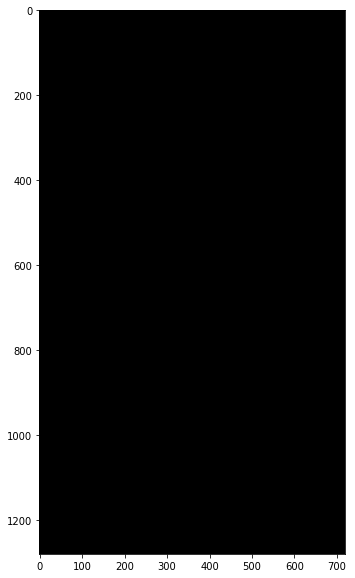

In [24]:
plt.figure(figsize=(10,10))
plt.imshow(frame)
plt.show()

In [11]:
img_hsv=cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

# lower mask (0-10)
lower_red = np.array([0,50,50])
upper_red = np.array([10,255,255])
mask0 = cv2.inRange(img_hsv, lower_red, upper_red)

# upper mask (170-180)
lower_red = np.array([170,50,50])
upper_red = np.array([180,255,255])
mask1 = cv2.inRange(img_hsv, lower_red, upper_red)

# join my masks
mask = mask0+mask1

# set my output img to zero everywhere except my mask
output_img = frame.copy()
output_img[np.where(mask==0)] = 0

# or your HSV image, which I *believe* is what you want
output_hsv = img_hsv.copy()
output_hsv[np.where(mask==0)] = 0

In [8]:
plt.imshow(output_img)

NameError: name 'output_img' is not defined

In [10]:
lower = [17, 15, 150]
upper = [50, 56, 255]
lower = np.array(lower, dtype = "uint8")
upper = np.array(upper, dtype = "uint8")

# find the colors within the specified boundaries and apply
# the mask
mask = cv2.inRange(frame, lower, upper)
# output = cv2.bitwise_and(frame, frame, mask = mask)

# # show the images
# cv2.imshow("images", np.hstack([frame, output]))

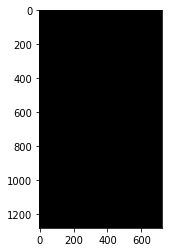

In [13]:
plt.imshow(mask, cmap="gray")

In [237]:
# Change resolution of image
scale = 50 # scale to X percent (100 means no scaling). CHANGE THIS FOR BETTER RESOLUTIONoriginal_width = video.size[1]
original_width = video.size[1]
original_height = video.size[0]
dims = (int(original_width * scale / 100), int(original_height * scale / 100))
print("Scale every frame to {d[0]} * {d[1]}".format(d=dims)) # single frame dimensions (height x width)

Scale every frame to 640 * 360


In [238]:
# Take times
fps = 100
M = create_data_matrix_from_video(video, fps, scale)
print(M.shape)

(230400, 800)


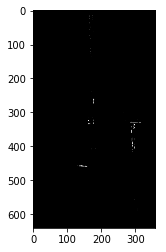

In [239]:
plt.imshow(np.reshape(M[:, 140], dims), cmap='gray')
plt.show()

In [240]:
M = M.astype(float)
U, Sigma, Vt = svds(M, k=2)

In [241]:
U.shape, Sigma.shape, Vt.shape

((230400, 2), (2,), (2, 800))

In [242]:
low_rank = U @ np.diag(Sigma) @ Vt # low_rank is background

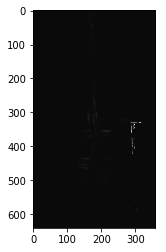

In [243]:
plt.imshow(np.reshape(low_rank[:, 140], dims), cmap='gray')
plt.show()

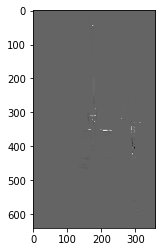

In [244]:
plt.imshow(np.reshape(M[:, 10] - low_rank[:, 10], dims), cmap='gray')
plt.show()

In [246]:
Weights = M - low_rank

In [1]:
Weights

NameError: name 'Weights' is not defined

In [247]:
Weights_frames = Weights.reshape(dims + (-1,))
Weights_frames.shape

(640, 360, 800)

[MoviePy] >>>> Building video ./weights_50.mp4
[MoviePy] Writing video ./weights_50.mp4


100%|█████████▉| 700/701 [00:35<00:00, 19.65it/s]

[MoviePy] Done.
[MoviePy] >>>> Video ready: ./weights_50.mp4 



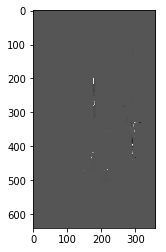

In [268]:
fig, ax = plt.subplots()
def make_frame(t):
    ax.clear()
    ax.imshow(Weights_frames[..., int(t*fps)], cmap="gray")
    return mplfig_to_npimage(fig)

animation = mpe.VideoClip(make_frame, duration=int((video.duration-1)))
animation.write_videofile('./weights_%s.mp4'%str(scale), fps=fps)

In [264]:
Weights_frames[..., int(t*fps)]

IndexError: index 1000 is out of bounds for axis 2 with size 800

In [267]:
int((video.duration-1))

7

In [266]:
video.duration-1

7.68